# Bike Store Sales

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### *Loading* our data:



use pd.read_csv to read data of .csv file

In [28]:
# 使用pd.read_csv讀取資料
sales = pd.read_csv(
    'campany\Company Information.csv',
    parse_dates=["Symbol"])

The data at a glance
觀看資料

In [29]:
sales.head()

,Symbol,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,...,bid,tradeable,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio
0,A,95051,Healthcare,17400.0,"Agilent Technologies, Inc. provides applicatio...",Santa Clara,800 227 9770,CA,United States,[],...,130.00,False,0.0063,800,133.63,NaN,133.55,NaN,https://logo.clearbit.com/agilent.com,2.3144
1,AAL,76155,Industrials,129200.0,"American Airlines Group Inc., through its subs...",Fort Worth,682 278 9000,TX,United States,[],...,15.10,False,NaN,28000,15.29,NaN,15.25,15.10,https://logo.clearbit.com/aa.com,NaN
2,AAP,27604,Consumer Cyclical,41000.0,"Advance Auto Parts, Inc. provides automotive r...",Raleigh,540 362 4911,NC,United States,[],...,202.02,False,0.0296,900,202.58,NaN,202.53,NaN,https://logo.clearbit.com/advanceautoparts.com,1.1090
3,AAPL,95014,Technology,154000.0,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],...,171.02,False,0.0053,3100,172.17,NaN,172.10,171.37,https://logo.clearbit.com/apple.com,3.0777
4,ABBV,60064-6400,Healthcare,50000.0,"AbbVie Inc. discovers, develops, manufactures,...",North Chicago,847 932 7900,IL,United States,[],...,141.12,False,0.0396,800,143.09,NaN,142.60,142.50,https://logo.clearbit.com/abbvie.com,NaN


data roll& colunm 檔案數量(row,colunm)

In [10]:
sales.shape

(504, 155)

data information 檔案資訊

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Columns: 155 entries, Symbol to trailingPegRatio
dtypes: bool(2), float64(103), int64(24), object(26)
memory usage: 603.5+ KB


## Numerical analysis and visualization 數值分析和可視化
### analyze the **Unit_Cost** colunm


### describe():List relevant statistics  
列出相關統計資料

In [13]:
sales.describe()

,fullTimeEmployees,maxAge,ebitdaMargins,profitMargins,grossMargins,operatingCashflow,revenueGrowth,operatingMargins,ebitda,targetLowPrice,...,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,trailingPegRatio
count,4.970000e+02,504.0,504.000000,504.000000,504.000000,4.590000e+02,503.000000,504.000000,4.740000e+02,480.000000,...,362.000000,504.000000,504.000000,398.000000,504.000000,504.000000,0.0,504.000000,357.000000,12.000000
mean,5.617899e+04,1.0,0.254762,0.157088,0.437821,4.914192e+09,0.679189,0.205998,6.309656e+09,154.093021,...,2.308840,136.951093,101.421409,0.023453,1888.690476,176.664661,NaN,176.260665,161.148749,3.373800
std,1.444135e+05,0.0,0.192693,0.163282,0.234488,1.112571e+10,7.974336,0.184235,1.322298e+10,258.536943,...,1.362649,216.620569,139.777536,0.016694,4931.387188,280.796222,NaN,279.992570,219.246427,4.244221
min,1.050000e+02,1.0,-1.628320,-1.567700,-0.836260,-2.681000e+09,-0.643000,-2.288450,-3.910000e+09,8.000000,...,0.020000,8.100000,0.000000,0.000200,800.000000,10.785000,NaN,10.720000,10.550000,1.109000
25%,9.418000e+03,1.0,0.144693,0.081933,0.281755,9.365000e+08,0.030500,0.128590,1.365475e+09,55.000000,...,1.275000,48.367500,0.000000,0.012325,800.000000,63.662500,NaN,63.612500,52.510000,1.508700
50%,1.967300e+04,1.0,0.234585,0.137270,0.426290,1.899000e+09,0.101000,0.188865,2.624767e+09,95.500000,...,2.195000,86.935000,62.995000,0.021050,1000.000000,110.959450,NaN,110.315000,100.350000,2.284100
75%,5.430000e+04,1.0,0.343035,0.220650,0.603040,4.457000e+09,0.196000,0.284850,5.691404e+09,180.000000,...,3.012500,165.642500,140.000000,0.030900,1200.000000,210.085000,NaN,208.463750,183.000000,3.012750
max,2.300000e+06,1.0,0.913490,1.132590,1.000000,1.182240e+11,167.368000,0.719340,1.295570e+11,4300.000000,...,10.450000,3576.010000,1757.000000,0.202900,47300.000000,4475.750000,NaN,4454.720000,2258.000000,16.624500


In [15]:
sales["grossMargins"].describe()

count    504.000000
mean       0.437821
std        0.234488
min       -0.836260
25%        0.281755
50%        0.426290
75%        0.603040
max        1.000000
Name: grossMargins, dtype: float64

單位成本 平均值

In [16]:
sales['grossMargins'].mean()

0.43782146809920675

單位成本 中位數

In [ ]:
sales["Unit_Cost"].median()

9.0

<AxesSubplot:>

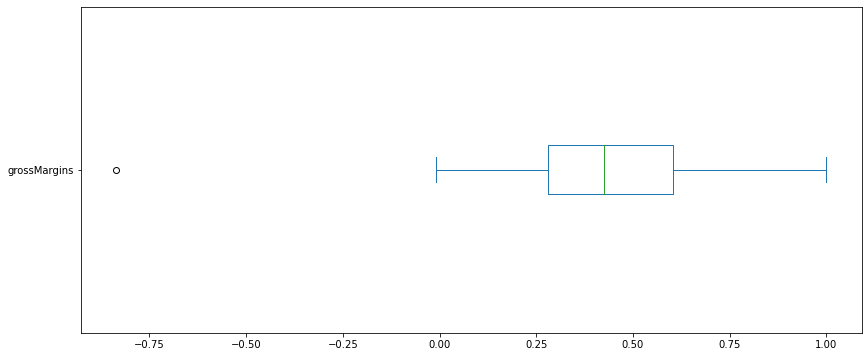

In [17]:
sales['grossMargins'].plot(kind = 'box', vert = False, figsize = (14,6))

plot density - 密度

<AxesSubplot:ylabel='Density'>

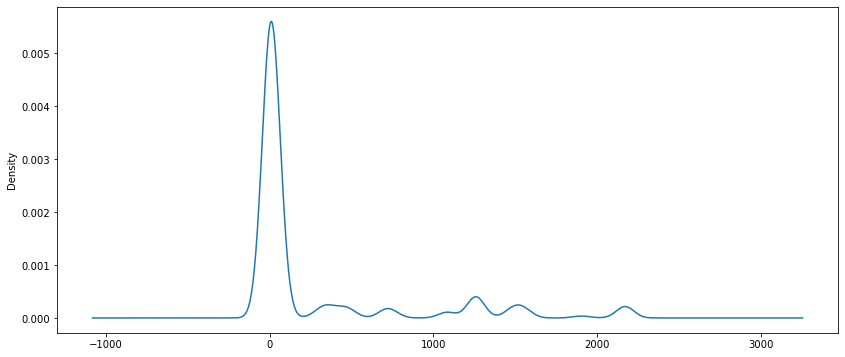

In [ ]:
sales['Unit_Cost'].plot(kind = 'density', figsize = (14, 6))  #kde

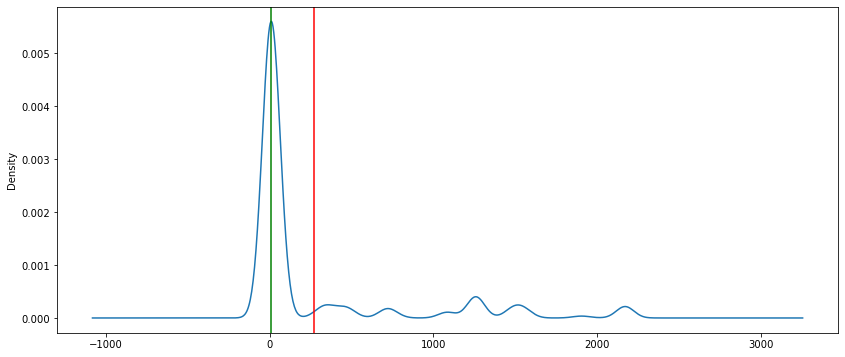

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

number of sales / dollars

Text(0.5, 0, 'dollars')

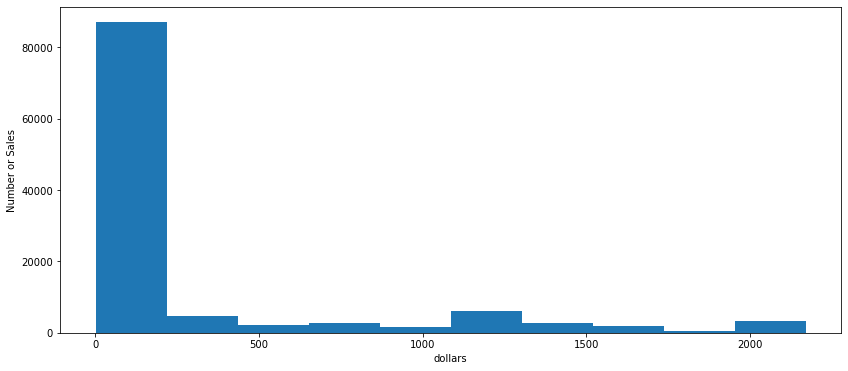

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

## Categorical analysis and visualization 分類分析及可視化
### analyze the **Age_Group** colunm

In [18]:
sales.head()

,Symbol,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,...,bid,tradeable,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio
0,A,95051,Healthcare,17400.0,"Agilent Technologies, Inc. provides applicatio...",Santa Clara,800 227 9770,CA,United States,[],...,130.00,False,0.0063,800,133.63,NaN,133.55,NaN,https://logo.clearbit.com/agilent.com,2.3144
1,AAL,76155,Industrials,129200.0,"American Airlines Group Inc., through its subs...",Fort Worth,682 278 9000,TX,United States,[],...,15.10,False,NaN,28000,15.29,NaN,15.25,15.10,https://logo.clearbit.com/aa.com,NaN
2,AAP,27604,Consumer Cyclical,41000.0,"Advance Auto Parts, Inc. provides automotive r...",Raleigh,540 362 4911,NC,United States,[],...,202.02,False,0.0296,900,202.58,NaN,202.53,NaN,https://logo.clearbit.com/advanceautoparts.com,1.1090
3,AAPL,95014,Technology,154000.0,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],...,171.02,False,0.0053,3100,172.17,NaN,172.10,171.37,https://logo.clearbit.com/apple.com,3.0777
4,ABBV,60064-6400,Healthcare,50000.0,"AbbVie Inc. discovers, develops, manufactures,...",North Chicago,847 932 7900,IL,United States,[],...,141.12,False,0.0396,800,143.09,NaN,142.60,142.50,https://logo.clearbit.com/abbvie.com,NaN


The quantity of each type in Age_Group 列出各類別數量

In [23]:
sales['sector'].value_counts()

Industrials               73
Technology                72
Financial Services        69
Healthcare                66
Consumer Cyclical         60
Consumer Defensive        36
Real Estate               31
Utilities                 29
Communication Services    26
Basic Materials           21
Energy                    21
Name: sector, dtype: int64

pie=圓餅圖

<AxesSubplot:ylabel='sector'>

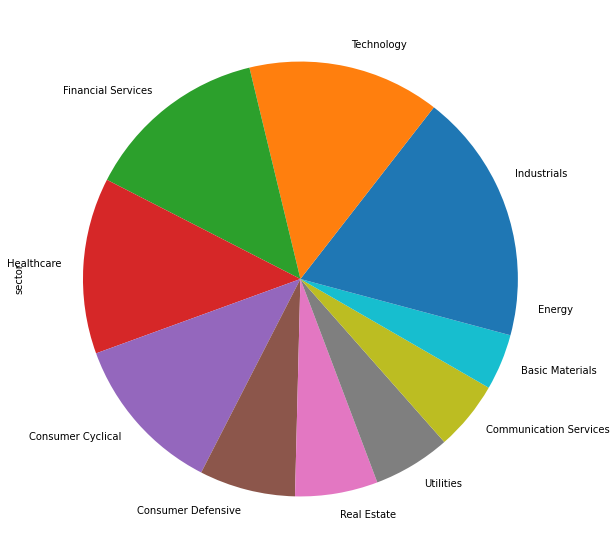

In [30]:
sales['sector'].value_counts().plot(kind="pie", figsize=(10,10))

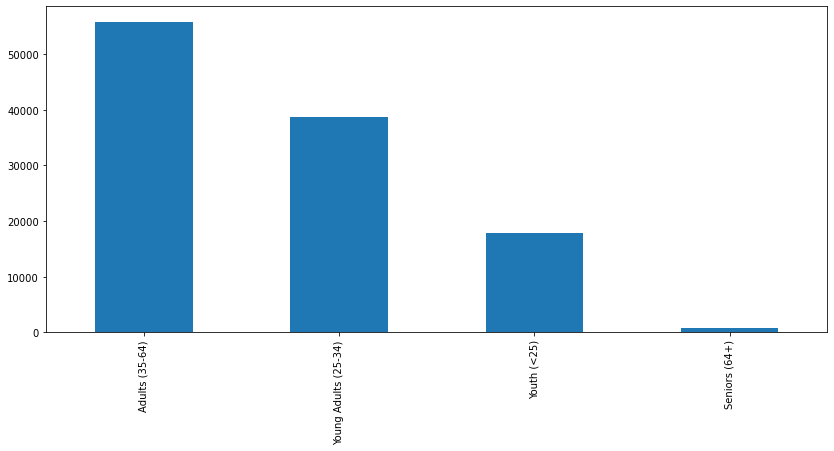

In [ ]:
ax = sales["Age_Group"].value_counts().plot(kind="bar", figsize=(14,6))

##Relationship between the columns 列之間的關係


corr() : 相關係數

In [ ]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x20741931190>,
 [Text(0, 0, 'fullTimeEmployees'),
  Text(0, 1, 'maxAge'),
  Text(0, 2, 'ebitdaMargins'),
  Text(0, 3, 'profitMargins'),
  Text(0, 4, 'grossMargins'),
  Text(0, 5, 'operatingCashflow'),
  Text(0, 6, 'revenueGrowth'),
  Text(0, 7, 'operatingMargins'),
  Text(0, 8, 'ebitda'),
  Text(0, 9, 'targetLowPrice'),
  Text(0, 10, 'grossProfits'),
  Text(0, 11, 'freeCashflow'),
  Text(0, 12, 'targetMedianPrice'),
  Text(0, 13, 'currentPrice'),
  Text(0, 14, 'earningsGrowth'),
  Text(0, 15, 'currentRatio'),
  Text(0, 16, 'returnOnAssets'),
  Text(0, 17, 'numberOfAnalystOpinions'),
  Text(0, 18, 'targetMeanPrice'),
  Text(0, 19, 'debtToEquity'),
  Text(0, 20, 'returnOnEquity'),
  Text(0, 21, 'targetHighPrice'),
  Text(0, 22, 'totalCash'),
  Text(0, 23, 'totalDebt'),
  Text(0, 24, 'totalRevenue'),
  Text(0, 25, 'totalCashPerShare'),
  Text(0, 26, 'revenuePerShare'),
  Text(0, 27, 'quickRatio'),
  Text(0, 28, 'recommendationMean'),
  Text(0, 29, 'isEsgPopula

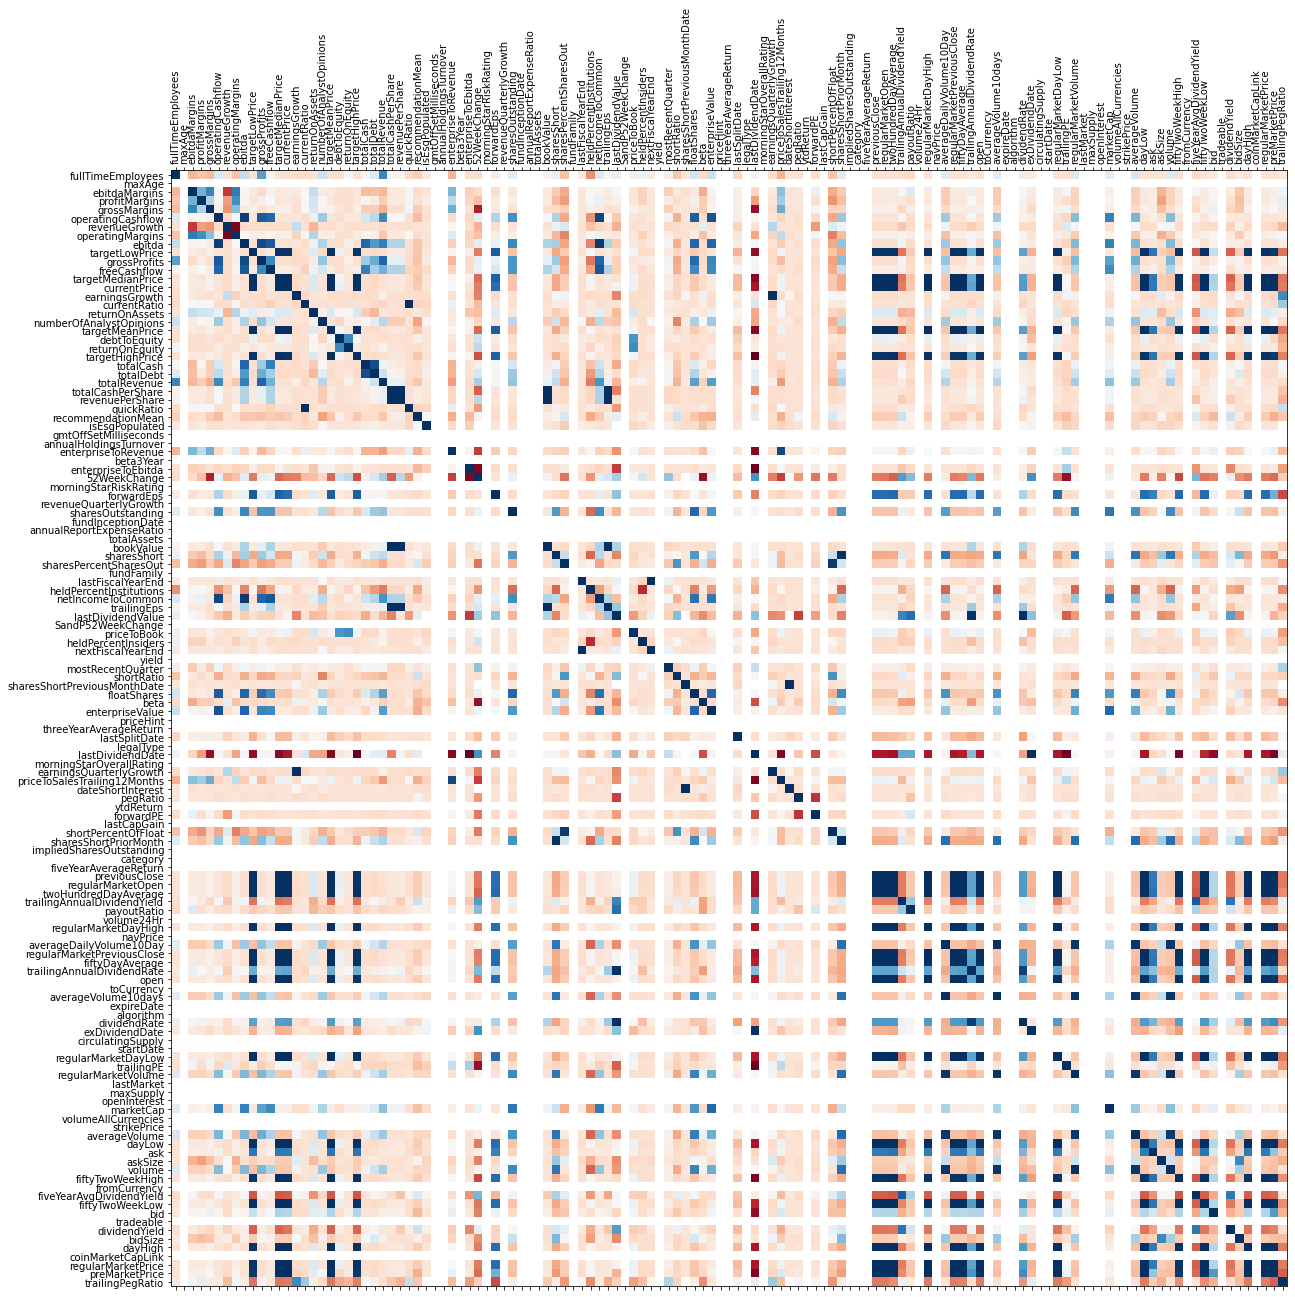

In [31]:
fig = plt.figure(figsize=(20,20))
plt.matshow(corr, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

scatter = 散布圖

x = 顧客年紀

y = 收入

In [33]:
sales.plot(kind="scatter", x='sector', y='Revenue', figsize=(6,6))

ValueError: sector is not a valid plot kind

x(Revenue)=收入

y(Profit)=利潤

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

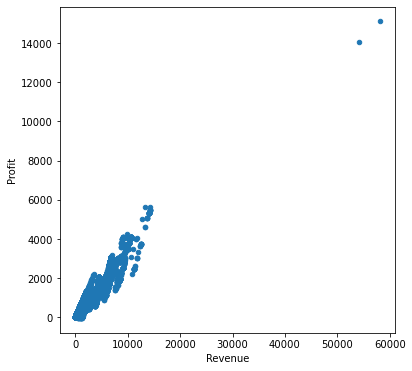

In [ ]:
sales.plot(kind='scatter', x='Revenue', y="Symbol", figsize=(10,10))

Text(0, 0.5, 'Profit')

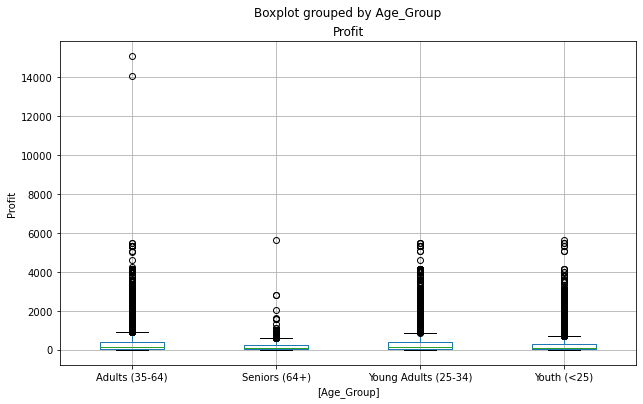

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by="Age_Group", figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

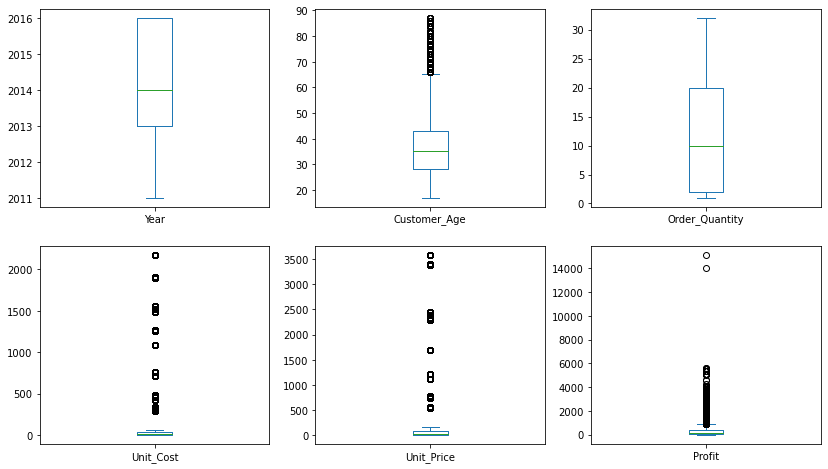

In [ ]:
boxplot_cols = ['Year', "Customer_Age", "Order_Quantity", "Unit_Cost", "Unit_Price", "Profit"]
sales[boxplot_cols].plot(kind="box", subplots=True, layout=(2,3), figsize=(14,8))

In [ ]:
sales["Revenue_per_Age"] = sales["Revenue"]/sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

In [ ]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

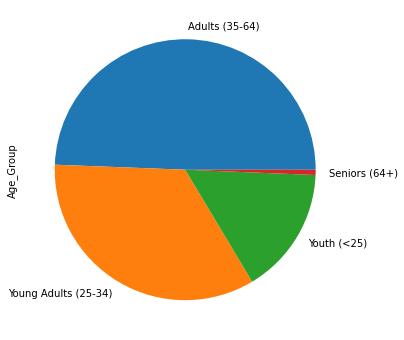

In [ ]:
sales['Age_Group'].value_counts().plot(kind="pie", figsize=(6,6))

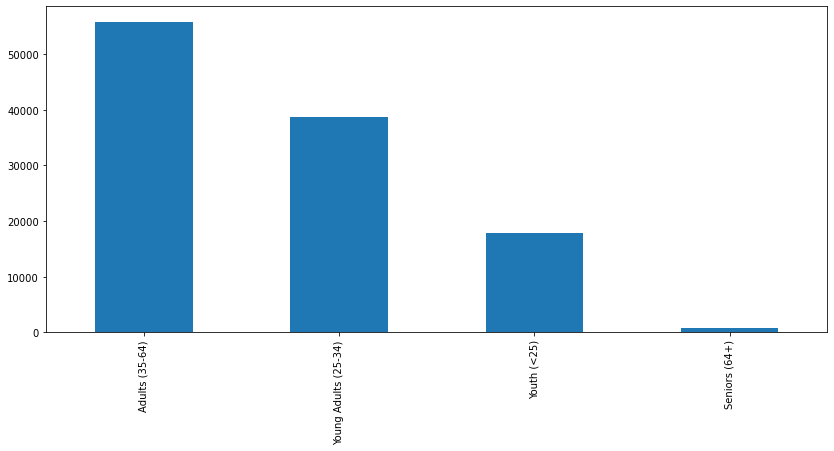

In [ ]:
ax = sales["Age_Group"].value_counts().plot(kind="bar", figsize=(14,6))

In [ ]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853,0.005472
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673,-0.215778
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326,-0.154795
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895,-0.301572
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865,0.779523
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522,0.779760
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572,0.898603
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758,0.935448
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000,0.943866
Revenue_per_Age,0.005472,-0.215778,-0.154795,-0.301572,0.779523,0.779760,0.898603,0.935448,0.943866,1.000000


([<matplotlib.axis.YTick at 0x1e0f51c0fd0>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue'),
  Text(0, 9, 'Revenue_per_Age')])

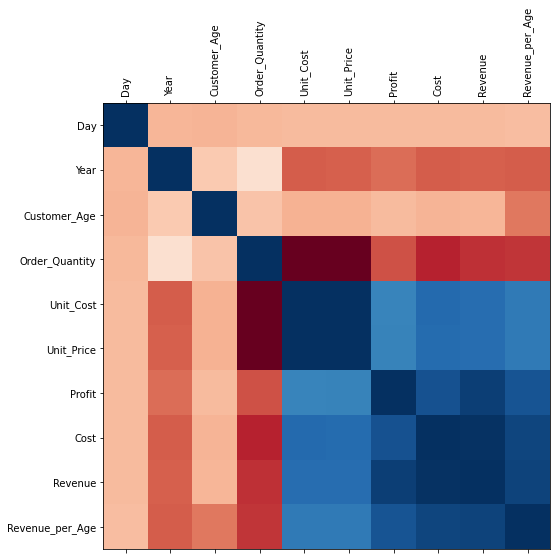

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

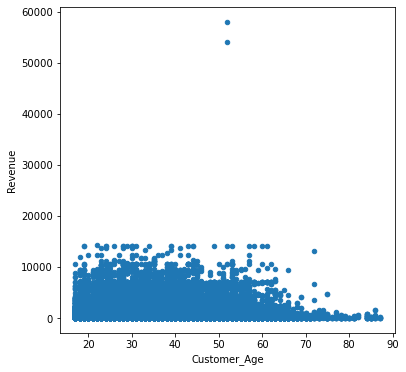

In [ ]:
sales.plot(kind="scatter", x='Customer_Age', y='Revenue', figsize=(6,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

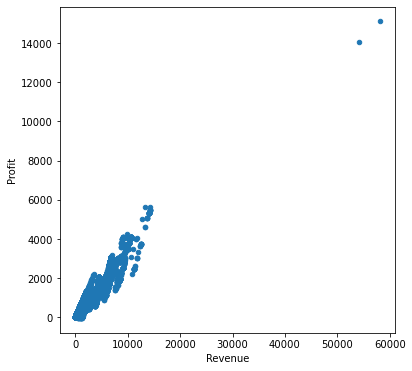

In [ ]:
sales.plot(kind='scatter', x='Revenue', y="Profit", figsize=(6,6))

Text(0, 0.5, 'Profit')

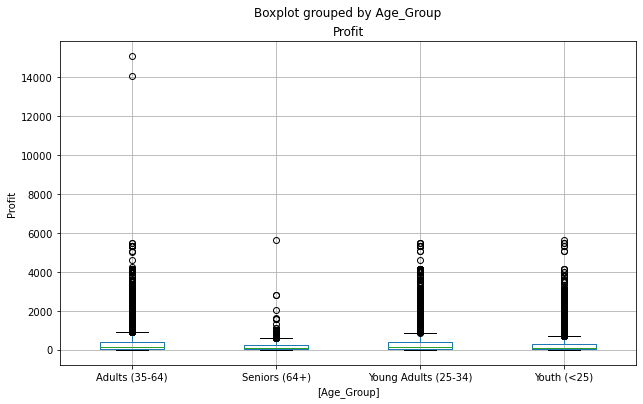

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by="Age_Group", figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

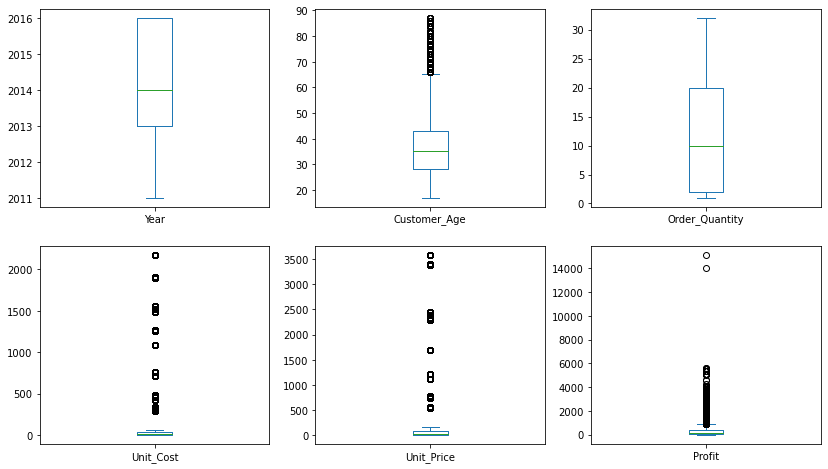

In [ ]:
boxplot_cols = ['Year', "Customer_Age", "Order_Quantity", "Unit_Cost", "Unit_Price", "Profit"]
sales[boxplot_cols].plot(kind="box", subplots=True, layout=(2,3), figsize=(14,8))

In [ ]:
sales["Revenue_per_Age"] = sales["Revenue"]/sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

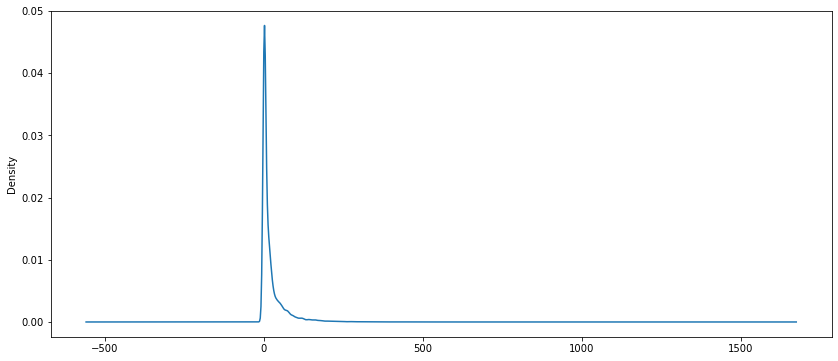

In [ ]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

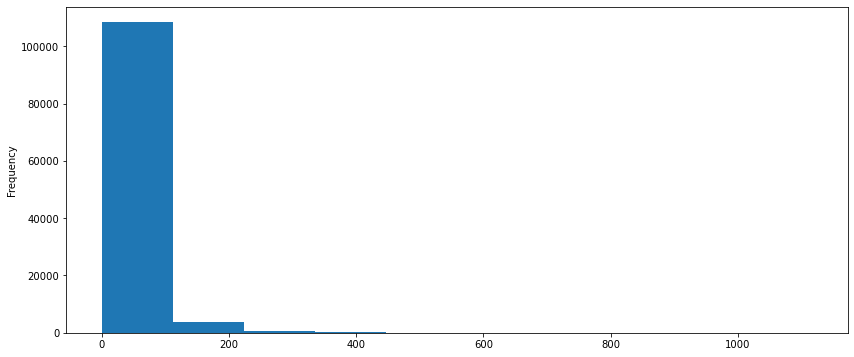

In [ ]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

In [ ]:
sales['Calcuated_Cost'] = sales['Order_Quantity'] * sales["Unit_Cost"]
sales['Calcuated_Cost'].head

<bound method NDFrame.head of 0          360
1          360
2         1035
3          900
4          180
          ... 
113031      72
113032     528
113033     528
113034     576
113035     552
Name: Calcuated_Cost, Length: 113036, dtype: int64>

In [ ]:
(sales['Calcuated_Cost'] != sales['Cost']).sum()

0

<AxesSubplot:xlabel='Calcuated_Cost', ylabel='Profit'>

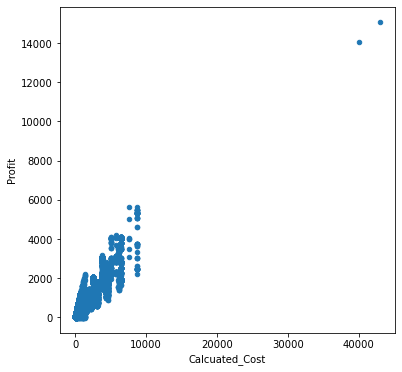

In [ ]:
sales.plot(kind='scatter', x='Calcuated_Cost', y='Profit', figsize=(6,6))

In [ ]:
sales["Calcuated_Revenue"] = sales["Cost"] + sales["Profit"]
sales["Calcuated_Revenue"].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calcuated_Revenue, dtype: int64

In [ ]:
(sales['Calcuated_Revenue'] != sales['Revenue']).sum()

0

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calcuated_Cost,Calcuated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<AxesSubplot:ylabel='Frequency'>

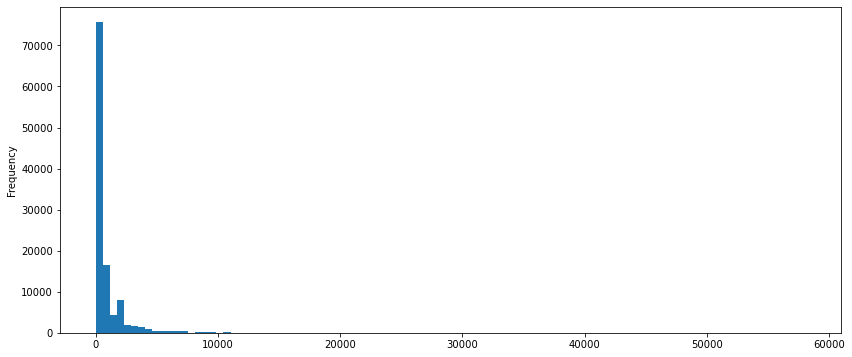

In [ ]:
sales["Revenue"].plot(kind='hist', bins=100, figsize=(14,6))

In [ ]:
sales['Unit_Price'].head()

0    127.308
1    127.308
2    127.308
3    127.308
4    127.308
Name: Unit_Price, dtype: float64

In [ ]:
sales['Unit_Price'] *= 1.03
sales['Unit_Price'].head()

0    131.12724
1    131.12724
2    131.12724
3    131.12724
4    131.12724
Name: Unit_Price, dtype: float64

In [ ]:
sales.loc[sales["State"] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calcuated_Cost,Calcuated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,131.127240,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,131.127240,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,24.039994,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,24.039994,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,38.245445,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,38.245445,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,32.781810,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,32.781810,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,32.781810,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,32.781810,288,198,486,12.150,198,486


In [ ]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [ ]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (34-64)')].shape[0]

17828

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)' )& (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64